In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [10]:
# Imputation is Filling the null values. Here we are filling the null values with median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [11]:
# Reading the data
df = pd.read_csv('/content/credit_scoring_sample (1).csv')

In [12]:
# Imputing the data
imputed_df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [14]:
imputed_df.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0.0,64.0,0.0,0.249908,0.0,0.0,8158.0,0.0
1,0.0,58.0,0.0,3870.000000,0.0,0.0,5166.0,0.0
2,0.0,41.0,0.0,0.456127,0.0,0.0,6666.0,0.0
3,0.0,43.0,0.0,0.000190,0.0,0.0,10500.0,2.0
4,1.0,49.0,0.0,0.271820,0.0,0.0,400.0,0.0


In [15]:
# Splitting the data into features and Class Variable
X = imputed_df.drop('SeriousDlqin2yrs', axis=1)
y = imputed_df['SeriousDlqin2yrs']

In [16]:
# Splitting the Data in train and test sets
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
# Initializing the Gradient Boosting Model
gbmodel = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [21]:
# Fitting the Model with Training Data
gbmodel.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [22]:
# Predicting the values
y_pred = gbmodel.predict(X_test)

In [24]:
# Calculating metrics
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.8389181692094313

In [25]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     28026
         1.0       0.73      0.44      0.55      8024

    accuracy                           0.84     36050
   macro avg       0.79      0.70      0.73     36050
weighted avg       0.83      0.84      0.82     36050



In [26]:
confusion_matrix(y_test, y_pred)

array([[26703,  1323],
       [ 4484,  3540]])

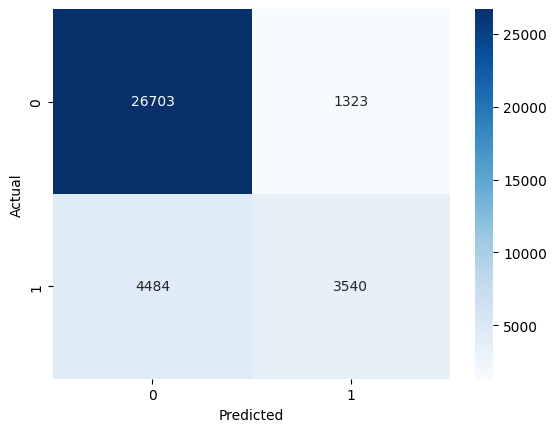

In [33]:
# Heatmap of Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Inputting the new Data
new_data = pd.DataFrame([{

  "age": 45,

  "NumberOfTime30-59DaysPastDueNotWorse": 1,

  "DebtRatio": 0.5,

  "NumberOfTimes90DaysLate": 0,

  "NumberOfTime60-89DaysPastDueNotWorse": 0,

  "MonthlyIncome": 6000,

  "NumberOfDependents": 2

}])


In [29]:
# Predicting the result for the new data
prediction = gbmodel.predict(new_data)

In [31]:
# printing the prediction
print(prediction)

[0.]


"The Prediction is 0 which means they are not going to default in next 2 years."